In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [62]:
import matplotlib.pyplot as plt
import random
#from tensorflow.examples.tutorials.mnist import input_data
#https://github.com/tensorflow/tensorflow
# 파이썬 설치폴더 -> lib/site-packages/tensorflow_core
# /examples에 복사
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [76]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
#트레이닝데이터, 테스트데이터

In [78]:
xtrain.shape
ytrain.shape

(60000,)

In [65]:
print(xtrain[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [79]:
#훈련셋 검증셋 분리
xval=xtrain[50000:]
yval=ytrain[50000:]
xtrain=xtrain[:50000]
ytrain=ytrain[:50000]

In [81]:
ytrain[0]

5

In [82]:
xtrain=xtrain.reshape(50000,784).astype('float32')/255.0
xval=xval.reshape(10000,784).astype('float32')/255.0
xtest=xtest.reshape(10000,784).astype('float32')/255.0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

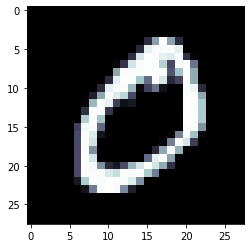

In [68]:
plt.imshow(xtrain[1].reshape(28,28),plt.cm.bone)
ytrain[1]

In [83]:
trainRandIdx=np.random.choice(50000,700)
valRandIdx=np.random.choice(10000,300)

In [84]:
xtrain=xtrain[trainRandIdx]
ytrain=ytrain[trainRandIdx]
xval=xval[valRandIdx]
yval=yval[valRandIdx]

In [88]:
yval.shape

(300,)

In [89]:
ytrain=np_utils.to_categorical(ytrain)
yval=np_utils.to_categorical(yval)
ytest=np_utils.to_categorical(ytest)

In [92]:
ytest.shape

(10000, 10)

In [93]:
#2. 모델 구성,    입력계층 히든계층 출력계층
model=Sequential()
model.add(Dense(units=2, input_dim=28*28, 
                       activation='relu')) #레이어 설계
#입력:784, 출력:2인 레이어 추가(add)
model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
#케라스 코딩 과정
"""
1)데이터셋 생성(훈련/검증/시험 생성)
2)모델 구성(Sequential(간단한 모델), 함수API(복잡한 모델))
3)모델 학습과정 설정(cost함수, 옵티마이저정의)-compile함수
4)모델 학습시키기(train data)-fit함수
5)학습과정 확인(훈련셋/검증셋 cost, 정확도 측정)->모델
6)모델 평가(test data)-evalute함수
7)모델 사용-predict함수
"""

In [75]:
data=[2,3,9,0,1]
np_utils.to_categorical(data)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)